### The file used for Activity Recognition using Weizman Dataset (Using Data Augmentation)

# Human Activity Recognition

## Obtain the input files

In [100]:
import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

# Loading the data
raw_data = load_files(os.getcwd() + r'/Data2', shuffle=False)
files = raw_data['filenames']
targets = raw_data['target']

train_files, test_files, train_targets, test_targets = train_test_split(files, targets, test_size=30, random_state=10)

valid_files = train_files[90:]
valid_targets = train_targets[90:]

train_files = train_files[:90]
train_targets = train_targets[:90]

# Generic details about the data
print('Total number of videos:', len(files))
print('\nNumber of videos in training data:', train_files.shape[0])
print('Number of videos in validation data:', valid_files.shape[0])
print('Number of videos in test data:', test_files.shape[0])

('Total number of videos:', 154)
('\nNumber of videos in training data:', 90)
('Number of videos in validation data:', 34)
('Number of videos in test data:', 30)


### Description of the class labels

In [101]:
print('The categorical labels are converted into integers.\nFollowing is the mapping - \n')
for label in zip(range(9), raw_data['target_names']):
    print(label)

The categorical labels are converted into integers.
Following is the mapping - 

(0, 'bend')
(1, 'jump')
(2, 'pjump')
(3, 'run')
(4, 'side')
(5, 'skip')
(6, 'walk')
(7, 'wave1')
(8, 'wave2')


### Each video file is associated with its class label

In [102]:
# Displaying the first 5 videos (paths) in the training data along with their labels
# (path of video, class label)
for pair in zip(train_files[:5], train_targets[:5]):
    print(pair)

('/home/geet/project/implementation/CNN/Data2/bend/denis_bend (copy).avi', 0)
('/home/geet/project/implementation/CNN/Data2/walk/moshe_walk (copy).avi', 6)
('/home/geet/project/implementation/CNN/Data2/side/moshe_side.avi', 4)
('/home/geet/project/implementation/CNN/Data2/walk/shahar_walk.avi', 6)
('/home/geet/project/implementation/CNN/Data2/walk/ido_walk.avi', 6)


## Test Case for the Number of Classes and their mapping

## Negative testcase

('\nShape of the sample data:', (85, 144, 180, 3))


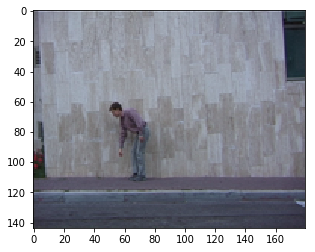

In [103]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import skvideo.io
%matplotlib inline


# The path of a sample video in the training data
sample_files = train_files[:1]

# An object of the class 'Videos'
sample = skvideo.io.vread(sample_files[0]);

print('\nShape of the sample data:', sample.shape)

# Displaying a frame from the sample video
plt.imshow(sample[50])

In [104]:
sec=2
frames_needed=20

In [105]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from keras.utils import to_categorical
import cv2
def read_video_bgsub(path,size):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        list_of_frames2 = []
        fps = int(cap.inputfps)                  # Frame Rate
        T,M,N,C= cap.getShape()
        frames=int(T)
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        fgbg = cv2.createBackgroundSubtractorMOG2()
        count = 0;
        
        total_length = frames/fps
        print("total_length:",total_length)
        excess_len = int((total_length-sec)/6)
        print("excess_length:",excess_len)
        excess_frames = excess_len*fps
        
        remove=0
        
        print("remove:",remove)
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            temp_image2 = image.array_to_img(frame)
            #print type(temp_image)
            fgmask = fgbg.apply(frame)
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
            
            fgmaskimg = Image.fromarray(fgmask)
            
            #print type(fgmask)
            frame = image.img_to_array(
                        fgmaskimg.resize(
                            (size, size),
                            Image.ANTIALIAS)).astype('uint8')
            frame2 = image.img_to_array(
                        temp_image2.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
            
            remove+=1;
            if index%frame_alternate == 0 and index>excess_frames:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    list_of_frames2.append(frame2);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [106]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from keras.utils import to_categorical
import cv2
def read_video_bgsub_flip(path,size):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        list_of_frames2 = []
        fps = int(cap.inputfps)                  # Frame Rate
        T,M,N,C= cap.getShape()
        frames=int(T)
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        fgbg = cv2.createBackgroundSubtractorMOG2()
        count = 0;
        
        
        total_length = frames/fps
        excess_len = int((total_length-sec)/6)
        
        excess_frames = excess_len*fps
        
        remove=0
        
            
            
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            #temp_image2= temp_image.transpose(Image.FLIP_LEFT_RIGHT)
            #temp_image3= image.img_to_array(temp_image2)
            #print type(temp_image)
            fgmask = fgbg.apply(frame)
#             fgmask = image.array_to_image(fgmask)
#             
#             fgmask = image.img_to_array(temp_image2)
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
            #print("fgmask:",type(fgmask))
            #fgmask = fgmask.transpose(Image.FLIP_LEFT_RIGHT)
            fgmask = np.flip(fgmask,1)
            fgmaskimg = Image.fromarray(fgmask)
            
            #print type(fgmask)
            frame = image.img_to_array(
                        fgmaskimg.resize(
                            (size, size),
                            Image.ANTIALIAS)).astype('uint8')
            frame2 = image.img_to_array(
                        fgmaskimg.resize(
                            (size, size),
                            Image.ANTIALIAS)).astype('uint8')
            
            remove+=1
            if index%frame_alternate == 0 and index>excess_frames:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    list_of_frames2.append(frame2);
                    count= count+1;

        temp_video = np.stack(list_of_frames2)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [107]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from keras.utils import to_categorical
def read_video_flip(path):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        list_of_frames2 = []
        fps = int(cap.inputfps)                  # Frame Rate
        T,M,N,C= cap.getShape()
        frames=int(T)
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        count = 0;
        
        total_length = frames/fps
        excess_len = int((total_length-sec)/6)
        
        excess_frames = excess_len*fps
        
        remove=0
                    
            
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            temp_image2= temp_image.transpose(Image.FLIP_LEFT_RIGHT)
            frame = image.img_to_array(
                        temp_image.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
            frame2 = image.img_to_array(
                        temp_image2.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
            remove+=1
            if index%frame_alternate == 0 and index>excess_frames:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    list_of_frames2.append(frame2);
                    count= count+1;

        temp_video = np.stack(list_of_frames2)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [108]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from keras.utils import to_categorical
def read_video(path):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        list_of_frames2 = []
        fps = int(cap.inputfps)                  # Frame Rate
        T,M,N,C= cap.getShape()
        frames=int(T)
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        count = 0;
        
        
        total_length = frames/fps
        excess_len = int((total_length-sec)/6)
        
        excess_frames = excess_len*fps
        
        remove=0
            
            
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            temp_image2= temp_image.transpose(Image.FLIP_LEFT_RIGHT)
            frame = image.img_to_array(
                        temp_image.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
            frame2 = image.img_to_array(
                        temp_image2.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
            remove+=1
            if index%frame_alternate == 0 and index>excess_frames:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    list_of_frames2.append(frame2);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [109]:
def read_videos(paths):
 
        list_of_videos = []
        list_of_videos_flip = []
        list_of_videos = [
            read_video(path) for path in tqdm(paths)
        ]
        list_of_videos_flip = [
            read_video_flip(path) for path in tqdm(paths)
        ]
        #print("shape1:", list_of_videos[1].shape)
        #print("shape2:", list_of_videos_flip[1].shape)
        list_of_videos+=list_of_videos_flip
        videos = np.vstack(list_of_videos)
        

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))


In [110]:
def read_videos_bgsub(paths, size):
     
        list_of_videos = []
        list_of_videos_flip = []
        list_of_videos = [
            read_video_bgsub(path, size) for path in tqdm(paths)
        ]
        list_of_videos_flip = [
            read_video_bgsub_flip(path, size) for path in tqdm(paths)
        ]
        
        list_of_videos+=list_of_videos_flip
        videos = np.vstack(list_of_videos)
        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))

In [111]:
# Reading training videos and one-hot encoding the training labels
X_train = read_videos(train_files)
y_train = to_categorical(train_targets, num_classes=9)
y_train = np.concatenate((y_train,y_train))
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', y_train.shape)

100%|██████████| 90/90 [00:19<00:00,  5.00it/s]


('Shape of training data:', (180, 20, 20, 20, 1))
('Shape of training labels:', (180, 9))


In [112]:
# Reading validation videos and one-hot encoding the validation labels
X_valid = read_videos(valid_files)
y_valid = to_categorical(valid_targets, num_classes=9)

X_train =  np.concatenate((X_train,X_valid[34:]))
y_train = np.concatenate((y_train,y_valid))

#X_train_bgsub = X_train_bgsub[(600+122):]
#y_train_bgsub = y_train_bgsub[(600+122):]
X_valid = X_valid[:34]
print('Shape of validation data:', X_valid.shape)
print('Shape of validation labels:', y_valid.shape)
print('Shape of Train data:', X_train.shape)
print('Shape of Train labels:', y_train.shape)

100%|██████████| 34/34 [00:07<00:00,  4.01it/s]

('Shape of validation data:', (34, 20, 20, 20, 1))
('Shape of validation labels:', (34, 9))
('Shape of Train data:', (214, 20, 20, 20, 1))
('Shape of Train labels:', (214, 9))


In [113]:
# Reading testing videos and one-hot encoding the testing labels
X_test = read_videos(test_files)
X_test = X_test[:30]
y_test = to_categorical(test_targets, num_classes=9)
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)

100%|██████████| 30/30 [00:07<00:00,  4.17it/s]

('Shape of testing data:', (30, 20, 20, 20, 1))
('Shape of testing labels:', (30, 9))


In [114]:
X_train_bgsub = read_videos_bgsub(train_files,20)
y_train_bgsub = to_categorical(train_targets, num_classes=9)
y_train_bgsub = np.concatenate((y_train_bgsub,y_train_bgsub))
print('Shape of training data:', X_train_bgsub.shape)
print('Shape of training labels:', y_train_bgsub.shape)

  0%|          | 0/90 [00:00<?, ?it/s]

('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


  1%|          | 1/90 [00:00<00:32,  2.77it/s]

('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


  3%|▎         | 3/90 [00:00<00:28,  3.10it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)
('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


  6%|▌         | 5/90 [00:01<00:26,  3.27it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


  7%|▋         | 6/90 [00:01<00:25,  3.26it/s]

('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


  8%|▊         | 7/90 [00:02<00:23,  3.47it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)
('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 10%|█         | 9/90 [00:02<00:23,  3.41it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 11%|█         | 10/90 [00:02<00:22,  3.51it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 12%|█▏        | 11/90 [00:03<00:22,  3.46it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 13%|█▎        | 12/90 [00:03<00:22,  3.50it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 14%|█▍        | 13/90 [00:03<00:22,  3.47it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 16%|█▌        | 14/90 [00:04<00:21,  3.54it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 17%|█▋        | 15/90 [00:04<00:20,  3.70it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 18%|█▊        | 16/90 [00:04<00:19,  3.80it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 19%|█▉        | 17/90 [00:04<00:18,  3.91it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 20%|██        | 18/90 [00:05<00:17,  4.09it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 21%|██        | 19/90 [00:05<00:16,  4.21it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 22%|██▏       | 20/90 [00:05<00:17,  3.89it/s]

('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


 23%|██▎       | 21/90 [00:05<00:17,  4.01it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 24%|██▍       | 22/90 [00:06<00:16,  4.01it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 26%|██▌       | 23/90 [00:06<00:16,  4.09it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 27%|██▋       | 24/90 [00:06<00:15,  4.20it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 28%|██▊       | 25/90 [00:06<00:16,  4.01it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 29%|██▉       | 26/90 [00:07<00:17,  3.70it/s]

('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


 30%|███       | 27/90 [00:07<00:16,  3.71it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 31%|███       | 28/90 [00:07<00:16,  3.86it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 32%|███▏      | 29/90 [00:07<00:15,  3.87it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 33%|███▎      | 30/90 [00:08<00:15,  3.85it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 34%|███▍      | 31/90 [00:08<00:14,  4.00it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 36%|███▌      | 32/90 [00:08<00:14,  4.02it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 37%|███▋      | 33/90 [00:08<00:14,  3.89it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 38%|███▊      | 34/90 [00:09<00:14,  3.94it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 39%|███▉      | 35/90 [00:09<00:13,  4.05it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 40%|████      | 36/90 [00:09<00:14,  3.77it/s]

('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


 41%|████      | 37/90 [00:09<00:14,  3.63it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 42%|████▏     | 38/90 [00:10<00:14,  3.53it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)
('total_length:', 4)
('excess_length:', 0)
('remove:', 0)


 44%|████▍     | 40/90 [00:10<00:14,  3.44it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 46%|████▌     | 41/90 [00:11<00:14,  3.50it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 47%|████▋     | 42/90 [00:11<00:12,  3.70it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 48%|████▊     | 43/90 [00:11<00:12,  3.76it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 49%|████▉     | 44/90 [00:11<00:12,  3.80it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)
('total_length:', 5)
('excess_length:', 0)
('remove:', 0)


 51%|█████     | 46/90 [00:12<00:13,  3.27it/s]

('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


 52%|█████▏    | 47/90 [00:12<00:12,  3.42it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 53%|█████▎    | 48/90 [00:13<00:11,  3.54it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 54%|█████▍    | 49/90 [00:13<00:11,  3.42it/s]

('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


 56%|█████▌    | 50/90 [00:13<00:11,  3.60it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 57%|█████▋    | 51/90 [00:13<00:10,  3.63it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 58%|█████▊    | 52/90 [00:14<00:10,  3.71it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 59%|█████▉    | 53/90 [00:14<00:10,  3.60it/s]

('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


 60%|██████    | 54/90 [00:14<00:09,  3.80it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 61%|██████    | 55/90 [00:15<00:09,  3.81it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 62%|██████▏   | 56/90 [00:15<00:08,  3.88it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 63%|██████▎   | 57/90 [00:15<00:08,  3.91it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 64%|██████▍   | 58/90 [00:15<00:08,  3.81it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 66%|██████▌   | 59/90 [00:16<00:08,  3.80it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 67%|██████▋   | 60/90 [00:16<00:07,  3.77it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 68%|██████▊   | 61/90 [00:16<00:07,  3.87it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 69%|██████▉   | 62/90 [00:16<00:07,  3.86it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 70%|███████   | 63/90 [00:17<00:06,  3.97it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 71%|███████   | 64/90 [00:17<00:06,  3.95it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 72%|███████▏  | 65/90 [00:17<00:06,  3.71it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 73%|███████▎  | 66/90 [00:17<00:06,  3.71it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 74%|███████▍  | 67/90 [00:18<00:06,  3.69it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 76%|███████▌  | 68/90 [00:18<00:05,  3.78it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 77%|███████▋  | 69/90 [00:18<00:05,  3.78it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 78%|███████▊  | 70/90 [00:18<00:05,  3.61it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 79%|███████▉  | 71/90 [00:19<00:05,  3.42it/s]

('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


 80%|████████  | 72/90 [00:19<00:04,  3.68it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 81%|████████  | 73/90 [00:19<00:04,  3.88it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 82%|████████▏ | 74/90 [00:20<00:04,  3.81it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 83%|████████▎ | 75/90 [00:20<00:03,  3.82it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 84%|████████▍ | 76/90 [00:20<00:03,  3.74it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 86%|████████▌ | 77/90 [00:20<00:03,  3.60it/s]

('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


 87%|████████▋ | 78/90 [00:21<00:03,  3.65it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 88%|████████▊ | 79/90 [00:21<00:02,  3.83it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 89%|████████▉ | 80/90 [00:21<00:02,  3.70it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 90%|█████████ | 81/90 [00:21<00:02,  3.75it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 91%|█████████ | 82/90 [00:22<00:02,  3.90it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 92%|█████████▏| 83/90 [00:22<00:01,  4.02it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 93%|█████████▎| 84/90 [00:22<00:01,  4.02it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 94%|█████████▍| 85/90 [00:22<00:01,  3.98it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 96%|█████████▌| 86/90 [00:23<00:01,  3.85it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 97%|█████████▋| 87/90 [00:23<00:00,  3.72it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 98%|█████████▊| 88/90 [00:23<00:00,  3.82it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 99%|█████████▉| 89/90 [00:23<00:00,  3.88it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


  0%|          | 0/90 [00:00<?, ?it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


100%|██████████| 90/90 [00:22<00:00,  4.23it/s]

('Shape of training data:', (180, 20, 20, 20, 1))
('Shape of training labels:', (180, 9))


In [115]:
X_test_bgsub = read_videos_bgsub(test_files,20)
y_test_bgsub = to_categorical(test_targets, num_classes=9)
X_test_bgsub = X_test_bgsub[:30]
print('Shape of testing data:', X_test_bgsub.shape)
print('Shape of testing labels:', y_test_bgsub.shape)

  0%|          | 0/30 [00:00<?, ?it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


  7%|▋         | 2/30 [00:00<00:07,  3.69it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 10%|█         | 3/30 [00:00<00:06,  3.90it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 13%|█▎        | 4/30 [00:00<00:06,  3.97it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 17%|█▋        | 5/30 [00:01<00:06,  4.10it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 20%|██        | 6/30 [00:01<00:06,  3.83it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 23%|██▎       | 7/30 [00:01<00:06,  3.60it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 27%|██▋       | 8/30 [00:02<00:06,  3.64it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)
('total_length:', 5)
('excess_length:', 0)
('remove:', 0)


 33%|███▎      | 10/30 [00:02<00:05,  3.41it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)
('total_length:', 4)
('excess_length:', 0)
('remove:', 0)


 40%|████      | 12/30 [00:03<00:05,  3.32it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 43%|████▎     | 13/30 [00:03<00:05,  3.27it/s]

('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


 47%|████▋     | 14/30 [00:03<00:04,  3.56it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 50%|█████     | 15/30 [00:04<00:04,  3.46it/s]

('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


 53%|█████▎    | 16/30 [00:04<00:03,  3.70it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 57%|█████▋    | 17/30 [00:04<00:03,  3.63it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 60%|██████    | 18/30 [00:05<00:03,  3.69it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 63%|██████▎   | 19/30 [00:05<00:02,  3.90it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 67%|██████▋   | 20/30 [00:05<00:02,  3.96it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 70%|███████   | 21/30 [00:05<00:02,  4.06it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 73%|███████▎  | 22/30 [00:05<00:02,  3.92it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 77%|███████▋  | 23/30 [00:06<00:01,  4.00it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 80%|████████  | 24/30 [00:06<00:01,  4.08it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)
('total_length:', 4)
('excess_length:', 0)
('remove:', 0)


 87%|████████▋ | 26/30 [00:07<00:01,  3.65it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 90%|█████████ | 27/30 [00:07<00:00,  3.82it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)
('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


 97%|█████████▋| 29/30 [00:07<00:00,  3.63it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


  0%|          | 0/30 [00:00<?, ?it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


100%|██████████| 30/30 [00:07<00:00,  3.90it/s]

('Shape of testing data:', (30, 20, 20, 20, 1))
('Shape of testing labels:', (30, 9))


In [116]:
X_valid_bgsub = read_videos_bgsub(valid_files,20)
y_valid_bgsub = to_categorical(valid_targets, num_classes=9)

print('Shape of validation data:', X_valid_bgsub.shape)
print('Shape of validation labels:', y_valid_bgsub.shape)
print('Shape of Train data:', X_train_bgsub.shape)
print('Shape of Train labels:', y_train_bgsub.shape)

X_train_bgsub =  np.concatenate((X_train_bgsub,X_valid_bgsub[34:]))
y_train_bgsub = np.concatenate((y_train_bgsub,y_valid_bgsub))

print('Shape of validation data:', X_valid_bgsub.shape)
print('Shape of validation labels:', y_valid_bgsub.shape)
print('Shape of Train data:', X_train_bgsub.shape)
print('Shape of Train labels:', y_train_bgsub.shape)

#X_train_bgsub = X_train_bgsub[(600+122):]
#y_train_bgsub = y_train_bgsub[(600+122):]
X_valid_bgsub = X_valid_bgsub[:34]
print('Shape of validation data:', X_valid_bgsub.shape)
print('Shape of validation labels:', y_valid_bgsub.shape)
print('Shape of Train data:', X_train_bgsub.shape)
print('Shape of Train labels:', y_train_bgsub.shape)

  0%|          | 0/34 [00:00<?, ?it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


  6%|▌         | 2/34 [00:00<00:08,  3.81it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


  9%|▉         | 3/34 [00:00<00:07,  4.01it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 12%|█▏        | 4/34 [00:00<00:07,  4.02it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 15%|█▍        | 5/34 [00:01<00:06,  4.17it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 18%|█▊        | 6/34 [00:01<00:06,  4.05it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 21%|██        | 7/34 [00:01<00:06,  3.98it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 24%|██▎       | 8/34 [00:01<00:06,  4.00it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)
('total_length:', 4)
('excess_length:', 0)
('remove:', 0)


 29%|██▉       | 10/34 [00:02<00:06,  3.60it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 32%|███▏      | 11/34 [00:02<00:05,  3.84it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 35%|███▌      | 12/34 [00:03<00:05,  3.94it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 38%|███▊      | 13/34 [00:03<00:05,  3.97it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 41%|████      | 14/34 [00:03<00:04,  4.13it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 44%|████▍     | 15/34 [00:03<00:04,  4.15it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)
('total_length:', 5)
('excess_length:', 0)
('remove:', 0)


 50%|█████     | 17/34 [00:04<00:05,  3.36it/s]

('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


 53%|█████▎    | 18/34 [00:04<00:04,  3.66it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 56%|█████▌    | 19/34 [00:04<00:03,  3.88it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 59%|█████▉    | 20/34 [00:05<00:03,  3.98it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 62%|██████▏   | 21/34 [00:05<00:03,  3.84it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 65%|██████▍   | 22/34 [00:05<00:03,  3.85it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 68%|██████▊   | 23/34 [00:06<00:03,  3.62it/s]

('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


 71%|███████   | 24/34 [00:06<00:02,  3.76it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 74%|███████▎  | 25/34 [00:06<00:02,  3.59it/s]

('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


 76%|███████▋  | 26/34 [00:06<00:02,  3.60it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)
('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


 82%|████████▏ | 28/34 [00:07<00:01,  3.57it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)
('total_length:', 5)
('excess_length:', 0)
('remove:', 0)


 88%|████████▊ | 30/34 [00:08<00:01,  3.43it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 91%|█████████ | 31/34 [00:08<00:00,  3.60it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 94%|█████████▍| 32/34 [00:08<00:00,  3.68it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 97%|█████████▋| 33/34 [00:08<00:00,  3.77it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)
('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


100%|██████████| 34/34 [00:08<00:00,  3.69it/s]

('Shape of validation data:', (68, 20, 20, 20, 1))
('Shape of validation labels:', (34, 9))
('Shape of Train data:', (180, 20, 20, 20, 1))
('Shape of Train labels:', (180, 9))
('Shape of validation data:', (68, 20, 20, 20, 1))
('Shape of validation labels:', (34, 9))
('Shape of Train data:', (214, 20, 20, 20, 1))
('Shape of Train labels:', (214, 9))
('Shape of validation data:', (34, 20, 20, 20, 1))
('Shape of validation labels:', (34, 9))
('Shape of Train data:', (214, 20, 20, 20, 1))
('Shape of Train labels:', (214, 9))


In [117]:
print("type:",type(X_train_bgsub))
print("type:",type(X_valid_bgsub))

('type:', <type 'numpy.ndarray'>)
('type:', <type 'numpy.ndarray'>)


 10%|█         | 1/10 [00:00<00:02,  4.06it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 20%|██        | 2/10 [00:00<00:01,  4.06it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 30%|███       | 3/10 [00:00<00:01,  4.10it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 40%|████      | 4/10 [00:00<00:01,  4.20it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 50%|█████     | 5/10 [00:01<00:01,  4.03it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)
('total_length:', 3)
('excess_length:', 0)
('remove:', 0)


 70%|███████   | 7/10 [00:01<00:00,  3.71it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


 80%|████████  | 8/10 [00:02<00:00,  3.88it/s]

('total_length:', 1)
('excess_length:', -1)
('remove:', 0)


 90%|█████████ | 9/10 [00:02<00:00,  3.90it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


  0%|          | 0/10 [00:00<?, ?it/s]

('total_length:', 2)
('excess_length:', 0)
('remove:', 0)


100%|██████████| 10/10 [00:02<00:00,  4.13it/s]


('Shape of validation data:', (20, 20, 20, 20, 1))
('Shape of validation labels:', (20, 20, 20, 20, 1))
['/home/geet/project/implementation/CNN/Data2/run/moshe_run (copy).avi'
 '/home/geet/project/implementation/CNN/Data2/skip/shahar_skip.avi'
 '/home/geet/project/implementation/CNN/Data2/jump/ido_jump.avi'
 '/home/geet/project/implementation/CNN/Data2/run/daria_run.avi'
 '/home/geet/project/implementation/CNN/Data2/side/ira_side (copy).avi'
 '/home/geet/project/implementation/CNN/Data2/walk/daria_walk (copy).avi'
 '/home/geet/project/implementation/CNN/Data2/run/ira_run (copy).avi'
 '/home/geet/project/implementation/CNN/Data2/side/shahar_side.avi'
 '/home/geet/project/implementation/CNN/Data2/pjump/shahar_pjump.avi'
 '/home/geet/project/implementation/CNN/Data2/bend/moshe_bend (copy).avi'
 '/home/geet/project/implementation/CNN/Data2/pjump/moshe_pjump (copy).avi'
 '/home/geet/project/implementation/CNN/Data2/side/denis_side.avi'
 '/home/geet/project/implementation/CNN/Data2/jump/deni

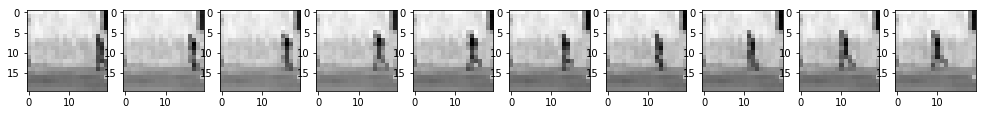

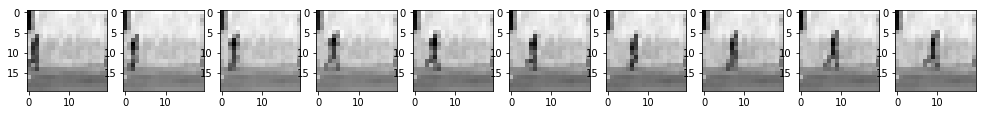

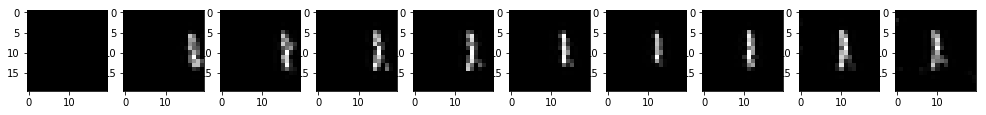

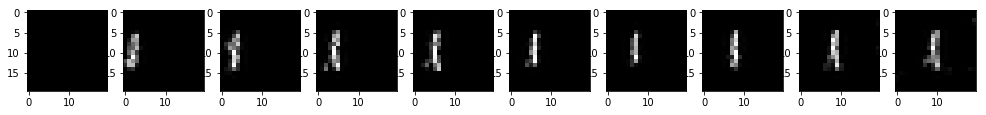

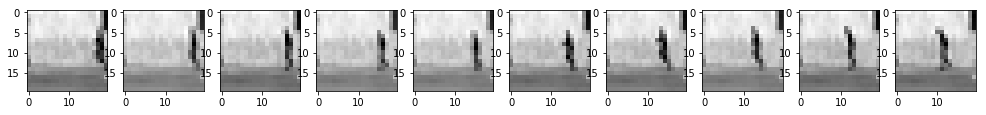

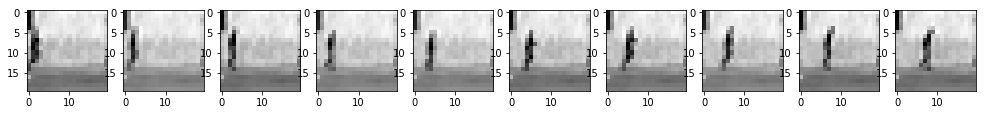

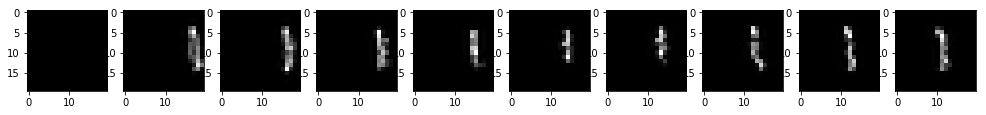

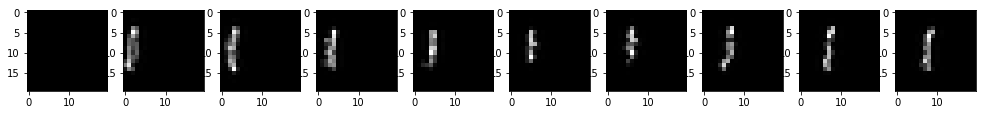

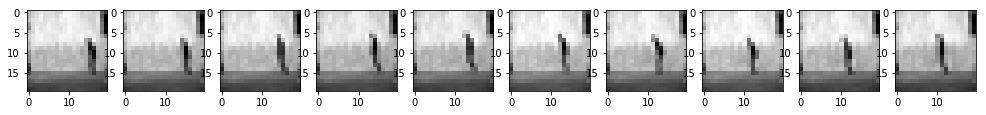

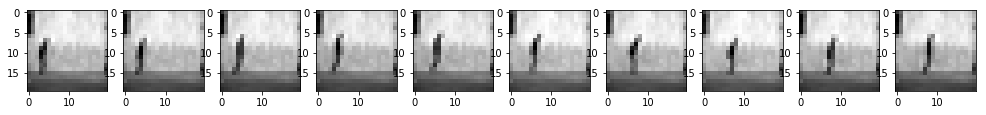

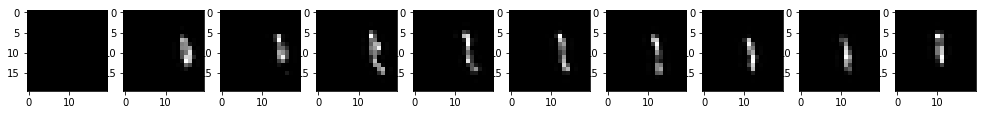

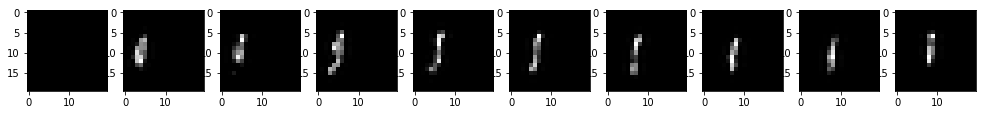

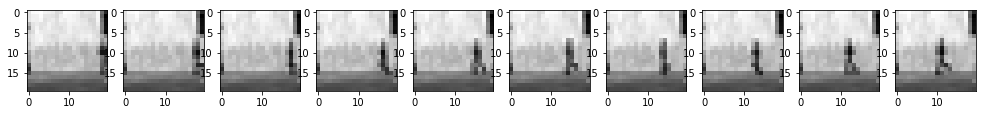

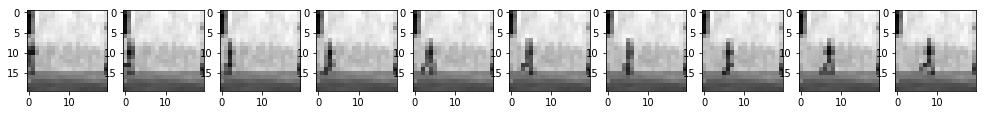

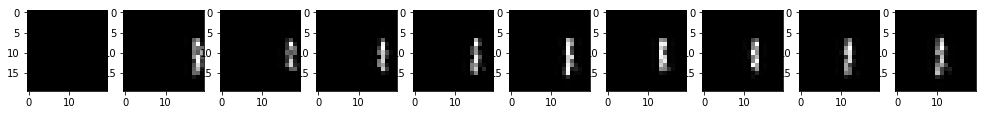

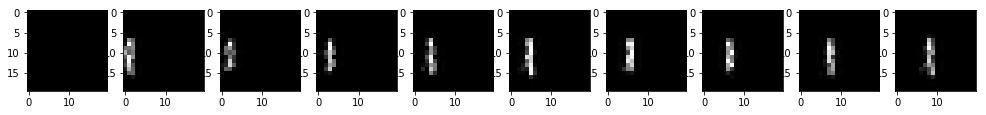

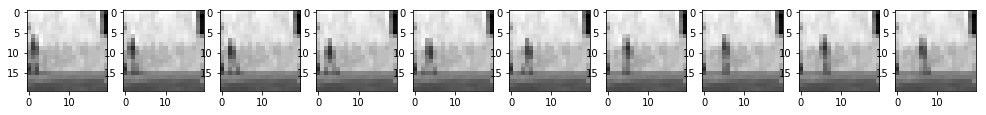

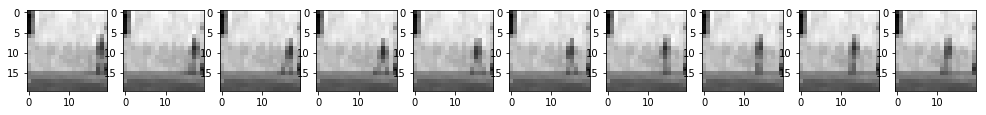

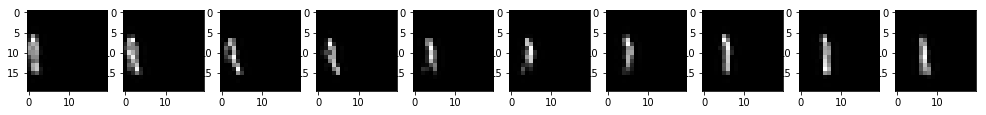

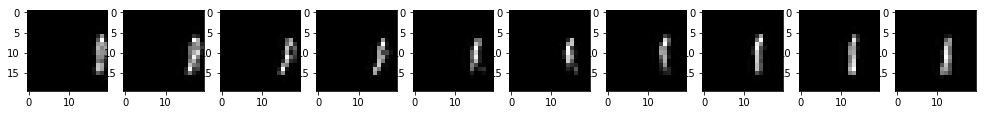

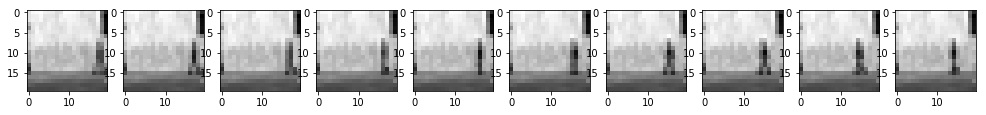

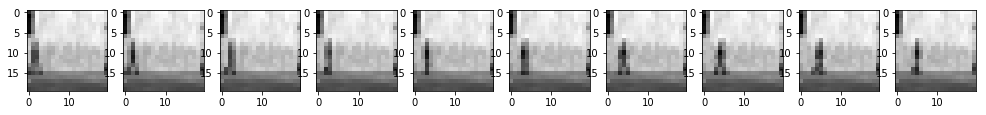

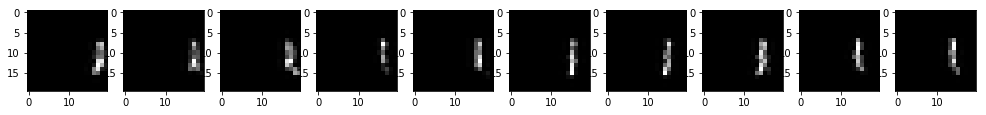

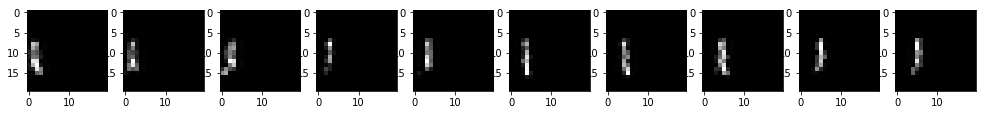

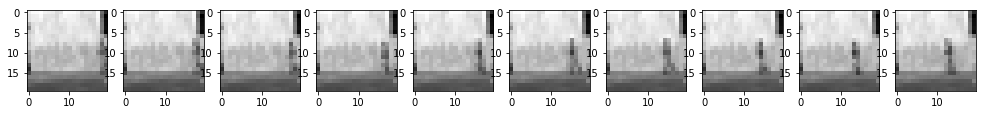

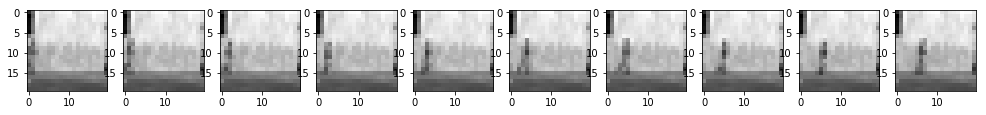

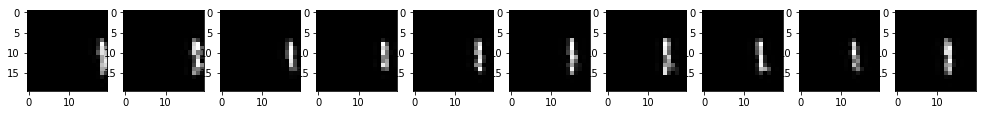

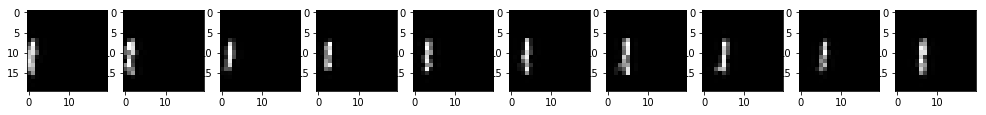

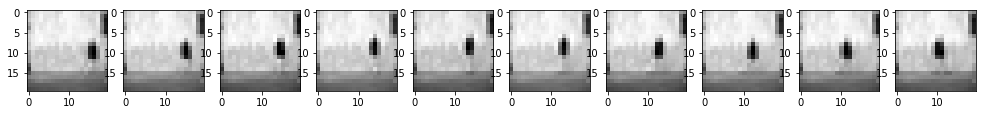

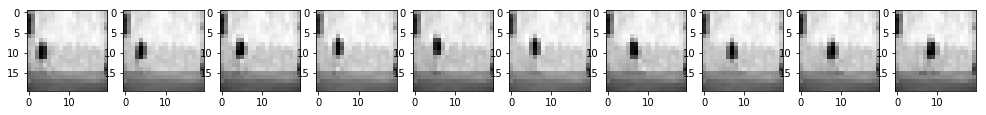

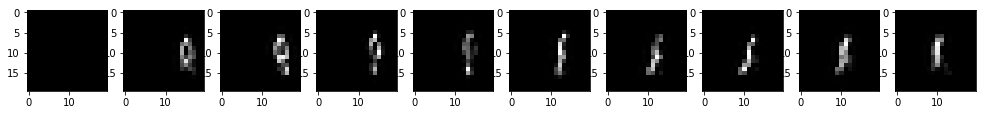

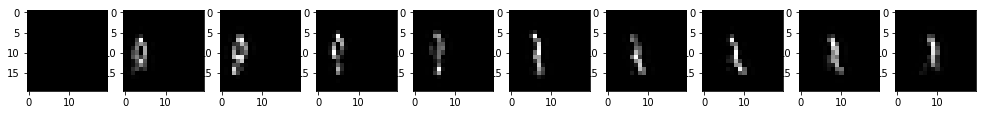

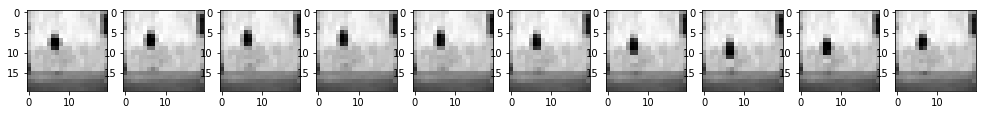

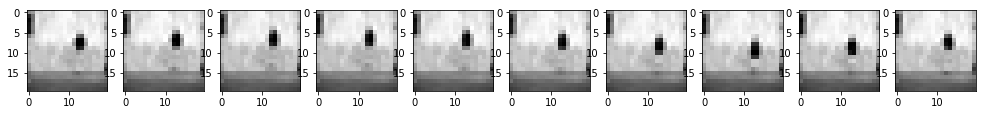

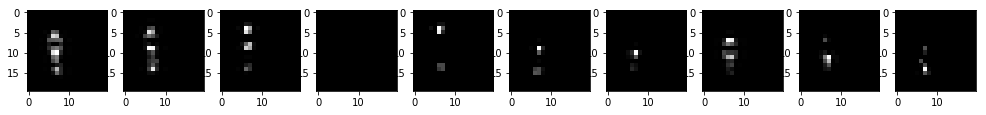

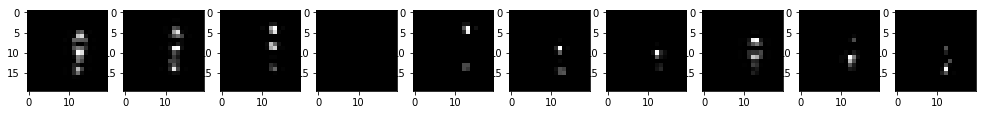

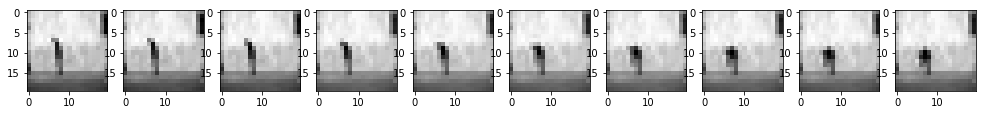

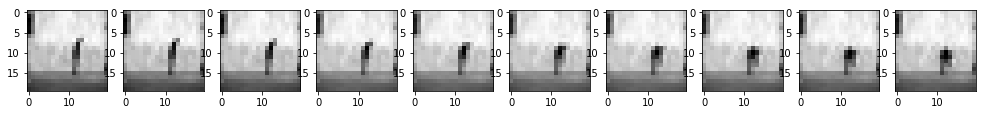

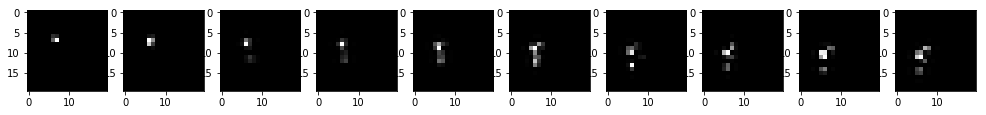

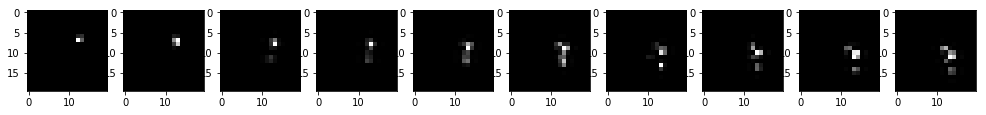

In [118]:
X_sample = read_videos(train_files[20:30])
X_sample_bgsub = read_videos_bgsub(train_files[20:30],20)

print('Shape of validation data:', X_sample.shape)
print('Shape of validation labels:', X_sample_bgsub.shape)
print(train_files[20:50])

from PIL import Image

for j in range(10):
    fig, axes = plt.subplots(1, 10,figsize=(17, 10))
    i=0;


    for frames in X_sample[j][:10]:
    #plt.imshow(frames[0])
            axes[i].imshow(np.squeeze(frames, axis=2), cmap='gray')
            i=i+1;
            #plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

    fig2, axes2 = plt.subplots(1, 10,figsize=(17, 10))
    i=0;
    for frames in X_sample[j+10][:10]:
    #plt.imshow(frames[0])
            axes2[i].imshow(np.squeeze(frames, axis=2), cmap='gray')
            i=i+1;
            #plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    
   
    fig3, axes3 = plt.subplots(1, 10,figsize=(17, 10))
    i=0;
    for frames in X_sample_bgsub[j][:10]:
    #plt.imshow(frames[0])
            axes3[i].imshow(np.squeeze(frames, axis=2), cmap='gray')
            i=i+1;
            #plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    
    fig4, axes4 = plt.subplots(1, 10,figsize=(17, 10))
    i=0;
    for frames in X_sample_bgsub[j+10][:10]:
    #plt.imshow(frames[0])
            axes4[i].imshow(np.squeeze(frames, axis=2), cmap='gray')
            i=i+1;
            #plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

## <font color='red'>Testcase to ensure that the number of data is same after processing<font color='red'>

## <font color='red'>Testcase to ensure that the number of data is same after processing<font color='red'>
### <font color='red'>Negative testcase by insering a redundant video<font color='red'>

('Class of 1st video:', 0)


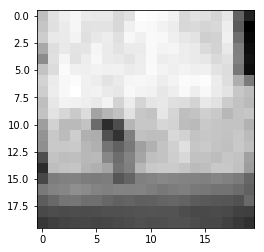

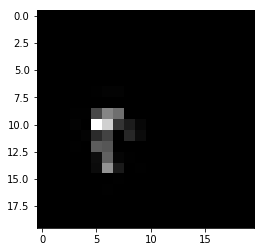

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# After pre-processing

# Displaying the 10th frame of the first processed video from the training data
print("Class of 1st video:",y_train[0].argmax());
plt.imshow(np.squeeze(X_train[0][10], axis=2), cmap='gray')
plt.show()
plt.imshow(np.squeeze(X_train_bgsub[0][10], axis=2), cmap='gray')

# Model 1 without BG Subtraction

In [21]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

#plt.show()


## Test Case to ensure that predicted values are within the available class

## Model - 2


# The model that worked

In [141]:
# from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model3 = Sequential()

# Adding Alternate convolutional and pooling layers
model3.add(Conv3D(filters=16, kernel_size=(5, 5, 5), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3.add(Conv3D(filters=64, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3.add(GlobalAveragePooling3D())

# Hidden layer
model3.add(Dense(32, activation='relu'))

# Dropout Layer
model3.add(Dropout(0.5))

# Output layer
model3.add(Dense(9, activation='softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_46 (Conv3D)           (None, 20, 20, 20, 16)    2016      
_________________________________________________________________
max_pooling3d_46 (MaxPooling (None, 10, 10, 10, 16)    0         
_________________________________________________________________
conv3d_47 (Conv3D)           (None, 8, 8, 8, 64)       27712     
_________________________________________________________________
max_pooling3d_47 (MaxPooling (None, 4, 4, 4, 64)       0         
_________________________________________________________________
conv3d_48 (Conv3D)           (None, 2, 2, 2, 256)      442624    
_________________________________________________________________
max_pooling3d_48 (MaxPooling (None, 1, 1, 1, 256)      0         
_________________________________________________________________
global_average_pooling3d_15  (None, 256)               0         
__________

In [142]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model3.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint3 = ModelCheckpoint(filepath='W_Model_3.weights.best.hdf5', save_best_only=True, verbose=1)


history3 = model3.fit(X_train, y_train, batch_size=15, epochs=150, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint3])

Train on 214 samples, validate on 34 samples
Epoch 1/150
 - 5s - loss: 2.2229 - acc: 0.1355 - val_loss: 2.1991 - val_acc: 0.1176

Epoch 00001: val_loss improved from inf to 2.19906, saving model to W_Model_3.weights.best.hdf5
Epoch 2/150
 - 3s - loss: 2.1972 - acc: 0.1308 - val_loss: 2.2263 - val_acc: 0.1471

Epoch 00002: val_loss did not improve from 2.19906
Epoch 3/150
 - 4s - loss: 2.1939 - acc: 0.1355 - val_loss: 2.1897 - val_acc: 0.1176

Epoch 00003: val_loss improved from 2.19906 to 2.18965, saving model to W_Model_3.weights.best.hdf5
Epoch 4/150
 - 3s - loss: 2.1809 - acc: 0.1729 - val_loss: 2.3604 - val_acc: 0.1176

Epoch 00004: val_loss did not improve from 2.18965
Epoch 5/150
 - 4s - loss: 2.1817 - acc: 0.1449 - val_loss: 2.1477 - val_acc: 0.2353

Epoch 00005: val_loss improved from 2.18965 to 2.14769, saving model to W_Model_3.weights.best.hdf5
Epoch 6/150
 - 4s - loss: 2.2920 - acc: 0.1542 - val_loss: 2.2833 - val_acc: 0.0294

Epoch 00006: val_loss did not improve from 2.14

 - 3s - loss: 0.8520 - acc: 0.5935 - val_loss: 0.7258 - val_acc: 0.5294

Epoch 00051: val_loss did not improve from 0.64365
Epoch 52/150
 - 3s - loss: 1.0075 - acc: 0.5187 - val_loss: 0.7470 - val_acc: 0.6176

Epoch 00052: val_loss did not improve from 0.64365
Epoch 53/150
 - 3s - loss: 0.8557 - acc: 0.5748 - val_loss: 0.7741 - val_acc: 0.6176

Epoch 00053: val_loss did not improve from 0.64365
Epoch 54/150
 - 3s - loss: 0.9092 - acc: 0.5607 - val_loss: 0.7450 - val_acc: 0.5294

Epoch 00054: val_loss did not improve from 0.64365
Epoch 55/150
 - 2s - loss: 0.9480 - acc: 0.5187 - val_loss: 1.0114 - val_acc: 0.5000

Epoch 00055: val_loss did not improve from 0.64365
Epoch 56/150
 - 3s - loss: 0.9350 - acc: 0.5093 - val_loss: 0.8078 - val_acc: 0.5294

Epoch 00056: val_loss did not improve from 0.64365
Epoch 57/150
 - 3s - loss: 0.9620 - acc: 0.5561 - val_loss: 1.0554 - val_acc: 0.5000

Epoch 00057: val_loss did not improve from 0.64365
Epoch 58/150
 - 3s - loss: 1.0911 - acc: 0.4439 - val_

 - 3s - loss: 0.7300 - acc: 0.7009 - val_loss: 0.9249 - val_acc: 0.6176

Epoch 00109: val_loss did not improve from 0.53382
Epoch 110/150
 - 3s - loss: 0.7857 - acc: 0.6495 - val_loss: 0.5761 - val_acc: 0.7059

Epoch 00110: val_loss did not improve from 0.53382
Epoch 111/150
 - 3s - loss: 0.7462 - acc: 0.7009 - val_loss: 0.6034 - val_acc: 0.6765

Epoch 00111: val_loss did not improve from 0.53382
Epoch 112/150
 - 3s - loss: 0.8569 - acc: 0.5935 - val_loss: 0.6503 - val_acc: 0.6176

Epoch 00112: val_loss did not improve from 0.53382
Epoch 113/150
 - 3s - loss: 0.6840 - acc: 0.6869 - val_loss: 0.7950 - val_acc: 0.5588

Epoch 00113: val_loss did not improve from 0.53382
Epoch 114/150
 - 3s - loss: 0.8208 - acc: 0.6589 - val_loss: 0.7211 - val_acc: 0.5294

Epoch 00114: val_loss did not improve from 0.53382
Epoch 115/150
 - 3s - loss: 0.7154 - acc: 0.6449 - val_loss: 0.7013 - val_acc: 0.6471

Epoch 00115: val_loss did not improve from 0.53382
Epoch 116/150
 - 3s - loss: 0.7152 - acc: 0.6589

In [143]:
# Loading the model that performed the best on the validation set
model3.load_weights('W_Model_3.weights.best.hdf5')

# Testing the model on the Test data
(loss3, accuracy3) = model3.evaluate(X_test, y_test, batch_size=16, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy3 * 100))

Accuracy on test data: 80.00%


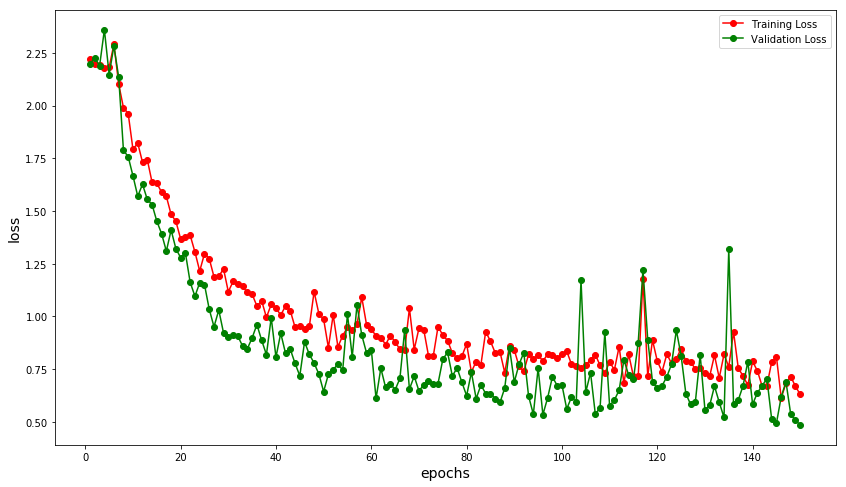

In [144]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss3 = history3.history['loss']                          # Loss on the training data
val_loss3 = history3.history['val_loss']                  # Loss on the validation data
epochs = range(1, 151)

plt.plot(epochs, loss3, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss3, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


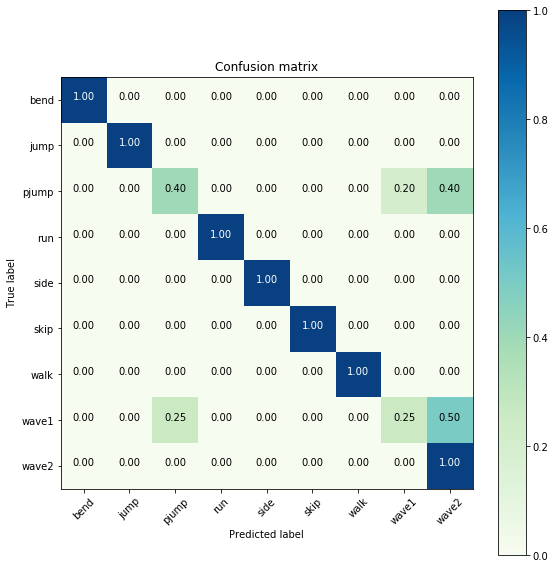

In [145]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions3 = model3.predict_classes(X_test);
y_pred3=to_categorical(y_predictions3, num_classes=9).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);

#print y_predictions3[:50]
#print y_test[:50]
model_cnf_matrix3 = confusion_matrix(y_test_cm,y_pred3);
#print(model_cnf_matrix3)
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix3, 
                                              classes=['bend','jump','pjump','run','side','skip','walk','wave1','wave2'], 
                                              normalize=True)


## Model3 BG Subtraction

In [119]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import TensorBoard
# Using the Sequential Model
model3_bg = Sequential()

# Adding Alternate convolutional and pooling layers
model3_bg.add(Conv3D(filters=16, kernel_size=(7, 7, 7), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg.add(Conv3D(filters=64, kernel_size=(5, 5, 5), strides=(1, 1, 1), padding='same', activation='relu'))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3_bg.add(GlobalAveragePooling3D())
model3_bg.add(Dropout(0.3))
# Hidden layer
model3_bg.add(Dense(64, activation='relu'))
model3_bg.add(Dropout(0.3))
model3_bg.add(Dense(32, activation='relu'))

# Dropout Layer
model3_bg.add(Dropout(0.5))

# Output layer
model3_bg.add(Dense(9, activation='softmax'))

model3_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_30 (Conv3D)           (None, 20, 20, 20, 16)    5504      
_________________________________________________________________
max_pooling3d_30 (MaxPooling (None, 10, 10, 10, 16)    0         
_________________________________________________________________
conv3d_31 (Conv3D)           (None, 10, 10, 10, 64)    128064    
_________________________________________________________________
max_pooling3d_31 (MaxPooling (None, 5, 5, 5, 64)       0         
_________________________________________________________________
conv3d_32 (Conv3D)           (None, 5, 5, 5, 256)      442624    
_________________________________________________________________
max_pooling3d_32 (MaxPooling (None, 3, 3, 3, 256)      0         
_________________________________________________________________
global_average_pooling3d_10  (None, 256)               0         
__________

In [120]:
##### Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model3_bg.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint3_bg = ModelCheckpoint(filepath='W_Model_3_bg.weights.best.hdf5', save_best_only=True, verbose=1)
#reduce_LR = ReduceLROnPlateau(monitor='val_loss', factor=0.95, patience=20, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
#tensorBoard = TensorBoard(log_dir='./wlogs4', histogram_freq=0, batch_size=5, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None)

history3_bg = model3_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=150, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint3_bg])

Train on 214 samples, validate on 34 samples
Epoch 1/150
214/214 [==============================] - 10s 46ms/step - loss: 2.2089 - acc: 0.1168 - val_loss: 2.1922 - val_acc: 0.2059

Epoch 00001: val_loss improved from inf to 2.19220, saving model to W_Model_3_bg.weights.best.hdf5
Epoch 2/150
214/214 [==============================] - 7s 35ms/step - loss: 2.1938 - acc: 0.1355 - val_loss: 2.0292 - val_acc: 0.1176

Epoch 00002: val_loss improved from 2.19220 to 2.02917, saving model to W_Model_3_bg.weights.best.hdf5
Epoch 3/150
214/214 [==============================] - 7s 34ms/step - loss: 2.0486 - acc: 0.1776 - val_loss: 1.7278 - val_acc: 0.1471

Epoch 00003: val_loss improved from 2.02917 to 1.72781, saving model to W_Model_3_bg.weights.best.hdf5
Epoch 4/150
214/214 [==============================] - 8s 37ms/step - loss: 1.9017 - acc: 0.2103 - val_loss: 1.6885 - val_acc: 0.1471

Epoch 00004: val_loss improved from 1.72781 to 1.68846, saving model to W_Model_3_bg.weights.best.hdf5
Epoch 

214/214 [==============================] - 8s 37ms/step - loss: 0.5535 - acc: 0.8037 - val_loss: 0.2125 - val_acc: 0.9706

Epoch 00038: val_loss did not improve from 0.19660
Epoch 39/150
214/214 [==============================] - 8s 37ms/step - loss: 0.3934 - acc: 0.8037 - val_loss: 0.5429 - val_acc: 0.8235

Epoch 00039: val_loss did not improve from 0.19660
Epoch 40/150
214/214 [==============================] - 8s 38ms/step - loss: 0.5618 - acc: 0.7617 - val_loss: 0.1424 - val_acc: 1.0000

Epoch 00040: val_loss improved from 0.19660 to 0.14241, saving model to W_Model_3_bg.weights.best.hdf5
Epoch 41/150
214/214 [==============================] - 9s 43ms/step - loss: 0.3095 - acc: 0.8832 - val_loss: 0.1019 - val_acc: 1.0000

Epoch 00041: val_loss improved from 0.14241 to 0.10187, saving model to W_Model_3_bg.weights.best.hdf5
Epoch 42/150
214/214 [==============================] - 8s 38ms/step - loss: 0.3555 - acc: 0.8692 - val_loss: 0.1167 - val_acc: 0.9706

Epoch 00042: val_loss did

214/214 [==============================] - 8s 39ms/step - loss: 0.0199 - acc: 0.9953 - val_loss: 1.5347e-04 - val_acc: 1.0000

Epoch 00121: val_loss improved from 0.00018 to 0.00015, saving model to W_Model_3_bg.weights.best.hdf5
Epoch 122/150
214/214 [==============================] - 8s 37ms/step - loss: 0.0360 - acc: 0.9907 - val_loss: 9.8347e-05 - val_acc: 1.0000

Epoch 00122: val_loss improved from 0.00015 to 0.00010, saving model to W_Model_3_bg.weights.best.hdf5
Epoch 123/150
214/214 [==============================] - 9s 40ms/step - loss: 0.0724 - acc: 0.9813 - val_loss: 0.0434 - val_acc: 0.9706

Epoch 00123: val_loss did not improve from 0.00010
Epoch 124/150
214/214 [==============================] - 8s 39ms/step - loss: 0.0927 - acc: 0.9579 - val_loss: 0.0317 - val_acc: 0.9706

Epoch 00124: val_loss did not improve from 0.00010
Epoch 125/150
214/214 [==============================] - 8s 39ms/step - loss: 0.1799 - acc: 0.9486 - val_loss: 0.0282 - val_acc: 0.9706

Epoch 00125: 

In [121]:
# Loading the model that performed the best on the validation set
model3_bg.load_weights('W_Model_3_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss3_bg, accuracy3_bg) = model3_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy3_bg * 100))

Accuracy on test data: 100.00%


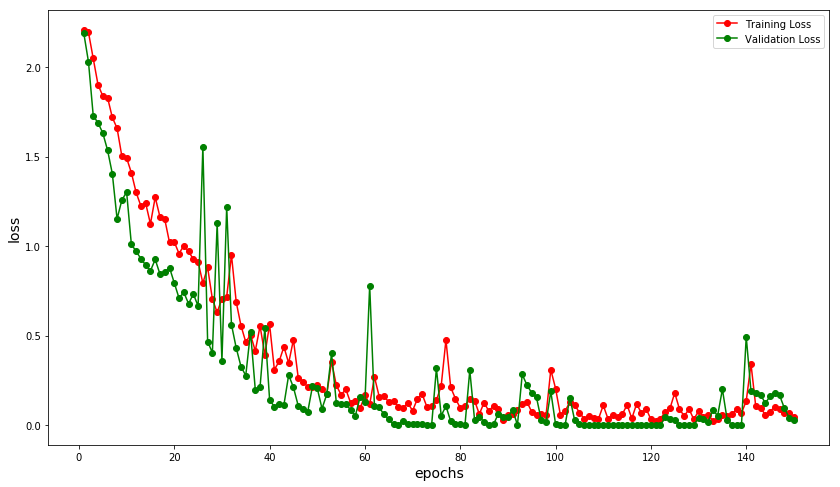

In [122]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss3_bg = history3_bg.history['loss']                          # Loss on the training data
val_loss3_bg = history3_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1, 151)

plt.plot(epochs, loss3_bg, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss3_bg, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

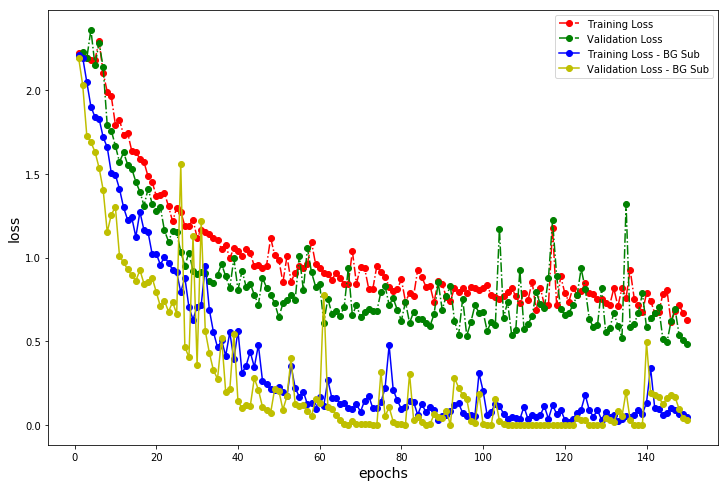

In [146]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss3, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss3, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss3_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss3_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


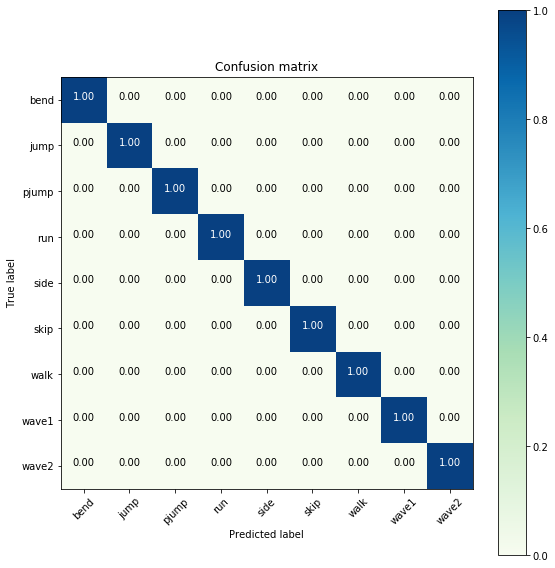

In [123]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions3_bg = model3_bg.predict_classes(X_test_bgsub);
y_pred3_bg=to_categorical(y_predictions3_bg, num_classes=9).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:50]
#print y_test[:50]
model_cnf_matrix3_bg = confusion_matrix(y_test_cm,y_pred3_bg);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix3_bg, 
                                              classes=['bend','jump','pjump','run','side','skip','walk','wave1','wave2'], 
                                              normalize=True)
